In [1]:
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
import sys, os
from sys import argv
import ROOT
from ROOT import TH1F, TCanvas, TFile
import pandas as pd
from dataclasses import make_dataclass
import multiprocessing as mp
import cmath
from array import array

Welcome to JupyROOT 6.22/08


In [2]:
def read_logscan(logfile):
    """This function is used to read logfiles generated by qnFit/sort.sh.
    To read the nll, file id and fit status into a dataframe.

    Args:
        logfile (_type_): _description_

    Returns:
        dataframe: _description_
    """
    # mass: bootstrapping file; id: fit result index; nll: NLL; status;
    one_log = make_dataclass("one_log", [("mass", float), ("id", str), ("nll",float), ("status", str)])
    df1 = pd.DataFrame()
    f1 = open(logfile,"r+")
    for l1 in f1:
        nll_temp = l1.split()[1]
        mass_temp = l1.split()[0].split("//")[1].split("-")[1]
        id_temp = l1.split()[0].split("//")[1].split("-")[2].split(".")[0]
        status_temp = l1.split()[3]
        df1 = df1.append([one_log(float(mass_temp), str(id_temp), float(nll_temp), str(status_temp))], ignore_index=True)
    return df1

In [3]:
# Use pd.groupby and pd.merge to get the id of minimum nll for each bootstrapping sample.
df1 = read_logscan("/disk401/lhcb/qinning/b2dpp_farm10/qnFit/bootstrapping/check_logBootstrappSpline.txt")
df_converged = df1[df1["status"] == "CONVERGED"]
df_groupby = df_converged[["mass","nll"]].groupby(by="mass")["nll"].min()
df_merge = pd.merge(df_groupby,df_converged,how="left",on=["mass","nll"])
df_merge_firstid = df_merge.groupby(by="mass")["id"].min()
df_merge = pd.merge(df_merge_firstid,df_merge,how="left",on=["mass","id"])
print(df_merge.head())
print(df_merge.shape)

   mass    id      nll     status
0   0.0  7002 -11140.3  CONVERGED
1   1.0  7018 -11394.1  CONVERGED
2   2.0  7022 -11202.5  CONVERGED
3   3.0  7035 -11251.8  CONVERGED
4   4.0  7041 -10959.0  CONVERGED
(200, 4)


In [4]:
title1 = ["SI_{0:02d}".format(i) for i in range(1,12)]
title2 = ["SR_{0:02d}".format(i) for i in range(1,12)]
title3 = ["ar_H0_Fwave","ai_H0_Fwave","Modulus_00","Phase_00"]
title = title1 + title2 + title3 + ["bootfile","id"]
df_original = pd.DataFrame(columns=title)
for i in range(0,200):
    temp_id = df_merge[df_merge["mass"]==i]["id"].values[0]
    temp_filename = "funcs_spline/fit-"+str(i)+"-"+str(temp_id)+".func"
    temp_file = open(temp_filename,"r+")
    dict_temp = {}
    for line1 in temp_file:
        dict_temp[line1.split()[0]] = line1.split()[2]
    dict_temp["bootfile"] = i
    dict_temp["id"] = temp_id
    df_temp = pd.DataFrame(dict_temp,index=[0])
    df_original = pd.concat([df_original,df_temp],join="inner")

df_original.to_csv("./temp_spline.csv",index=False)

In [5]:
df_original = pd.read_csv("./temp_spline.csv")
for i in range(1,12):
    """ This part, the complex number = H*ci
    df_original["modulus_{0:02d}".format(i)] = np.sqrt(pow(df_original["SR_{0:02d}".format(i)] * df_original["ar_H0_Fwave"] - df_original["SI_{0:02d}".format(i)] * df_original["ai_H0_Fwave"],2) + pow(df_original["SI_{0:02d}".format(i)] * df_original["ar_H0_Fwave"] + df_original["SR_{0:02d}".format(i)] * df_original["ai_H0_Fwave"],2))
    df_original["phase_{0:02d}".format(i)] = 2*np.arctan2((df_original["SI_{0:02d}".format(i)] * df_original["ar_H0_Fwave"] + df_original["SR_{0:02d}".format(i)] * df_original["ai_H0_Fwave"]),df_original["modulus_{0:02d}".format(i)] + df_original["SR_{0:02d}".format(i)] * df_original["ar_H0_Fwave"] - df_original["SI_{0:02d}".format(i)] * df_original["ai_H0_Fwave"] )
    """
    df_original["Modulus_{0:02d}".format(i)] = np.sqrt(pow(df_original["SR_{0:02d}".format(i)],2) + pow(df_original["SI_{0:02d}".format(i)],2))
    df_original["Phase_{0:02d}".format(i)] = 2*np.arctan2(df_original["SI_{0:02d}".format(i)],df_original["Modulus_{0:02d}".format(i)] + df_original["SR_{0:02d}".format(i)] )

#print(df_original.head())
#print(df_original.shape)
df_original.to_csv("./temp_2_spline.csv",index=False)

In [6]:
list_dat = [1.8766,1.9,1.925,1.95,1.975,2.0,2.1,2.2,2.5,2.8,3.1,3.4]


In [7]:
Modulus_00 = 2.06218e+00
Phase_00 = -1.34
"""model0 fit result
SI_00= 1.74524e+00
SI_01=-1.56857e-01
SI_02=-9.14436e-02
SI_03= 0.00000e+00
SI_04= 5.12913e-01
SI_05= 7.60372e-01
SI_06= 5.76227e-01
SI_07= 4.55941e-01
SI_08= 2.96012e-01
SI_09= 2.34881e-01
SI_10= 1.74251e-01
SI_11= 2.58854e-01
SR_00= 9.54151e-01
SR_01= 1.04661e+00
SR_02= 1.03966e+00
SR_03= 1.00000e+00
SR_04= 7.83876e-01
SR_05= 4.94534e-01
SR_06=-8.93135e-02
SR_07=-2.30768e-01
SR_08=-1.51725e-01
SR_09=-6.69104e-02
SR_10=-9.09693e-02
SR_11=-3.31553e-01
"""
""" Fix the Phase_00 to -1.34, fit result
"""
SI_01 = -3.55418e-02
SI_02 = -2.36511e-01
SI_03 = 0.00000e+00
SI_04 = 5.48331e-01
SI_05 = 7.78190e-01
SI_06 = 5.81945e-01
SI_07 = 4.58533e-01
SI_08 = 2.96770e-01
SI_09 = 2.35648e-01
SI_10 = 1.74319e-01
SI_11 = 2.50785e-01
SR_01 = 1.06718e+00
SR_02 = 1.01849e+00
SR_03 = 1.00000e+00
SR_04 = 7.72474e-01
SR_05 = 4.82287e-01
SR_06 = -9.01547e-02
SR_07 = -2.28878e-01
SR_08 = -1.59900e-01
SR_09 = -8.23599e-02
SR_10 = -1.04626e-01
SR_11 = -3.54250e-01
ai_H0_Fwave = -1.12716e-01
ar_H0_Fwave = -3.16488e+00  
dict_SI = {}
dict_SR = {}
for i in range(1,12):
    dict_SI["SI_{0:02d}".format(i)] = eval("SI_{0:02d}".format(i))
    dict_SR["SR_{0:02d}".format(i)] = eval("SR_{0:02d}".format(i))
dict_Fwave = {"ai_H0_Fwave":ai_H0_Fwave,"ar_H0_Fwave":ar_H0_Fwave,"Modulus_00":Modulus_00,"Phase_00":Phase_00}
dict_all = dict_SI.copy()
dict_all.update(dict_SR)
dict_all.update(dict_Fwave)
dict_all["bootfile"] = -999
dict_all["id"] = -999

In [8]:
#dict_all
df_realvalue = pd.DataFrame(dict_all,index=[0])
for i in range(1,12):
    """ This part, the complex number = H*ci
    df_realvalue["modulus_{0:02d}".format(i)] = np.sqrt(pow(df_realvalue["SR_{0:02d}".format(i)] * df_realvalue["ar_H0_Fwave"] - df_realvalue["SI_{0:02d}".format(i)] * df_realvalue["ai_H0_Fwave"],2) + pow(df_realvalue["SI_{0:02d}".format(i)] * df_realvalue["ar_H0_Fwave"] + df_realvalue["SR_{0:02d}".format(i)] * df_realvalue["ai_H0_Fwave"],2))
    df_realvalue["phase_{0:02d}".format(i)] = 2*np.arctan2((df_realvalue["SI_{0:02d}".format(i)] * df_realvalue["ar_H0_Fwave"] + df_realvalue["SR_{0:02d}".format(i)] * df_realvalue["ai_H0_Fwave"]),df_realvalue["modulus_{0:02d}".format(i)] + df_realvalue["SR_{0:02d}".format(i)] * df_realvalue["ar_H0_Fwave"] - df_realvalue["SI_{0:02d}".format(i)] * df_realvalue["ai_H0_Fwave"] )
    """
    df_realvalue["Modulus_{0:02d}".format(i)] = np.sqrt(pow(df_realvalue["SR_{0:02d}".format(i)],2) + pow(df_realvalue["SI_{0:02d}".format(i)],2))
    df_realvalue["Phase_{0:02d}".format(i)] = 2*np.arctan2(df_realvalue["SI_{0:02d}".format(i)],df_realvalue["Modulus_{0:02d}".format(i)] + df_realvalue["SR_{0:02d}".format(i)] )

df_realvalue.to_csv("./realvalue.csv",index=False)

In [9]:
#for i in range(0,12):
#    mask = df_original["phase_{0:02d}".format(i)]<0
#    df_original.loc[mask,"phase_{0:02d}".format(i)] = df_original.loc[mask,"phase_{0:02d}".format(i)] + 2*np.pi
#    mask2 = df_realvalue["phase_{0:02d}".format(i)]<0
#    df_realvalue.loc[mask2,"phase_{0:02d}".format(i)] = df_realvalue.loc[mask2,"phase_{0:02d}".format(i)] + 2*np.pi
#df_original["phase_00"]

['Modulus_00', 'Phase_00', 'Modulus_01', 'Phase_01', 'Modulus_02', 'Phase_02', 'Modulus_03', 'Phase_03', 'Modulus_04', 'Phase_04', 'Modulus_05', 'Phase_05', 'Modulus_06', 'Phase_06', 'Modulus_07', 'Phase_07', 'Modulus_08', 'Phase_08', 'Modulus_09', 'Phase_09', 'Modulus_10', 'Phase_10', 'Modulus_11', 'Phase_11']


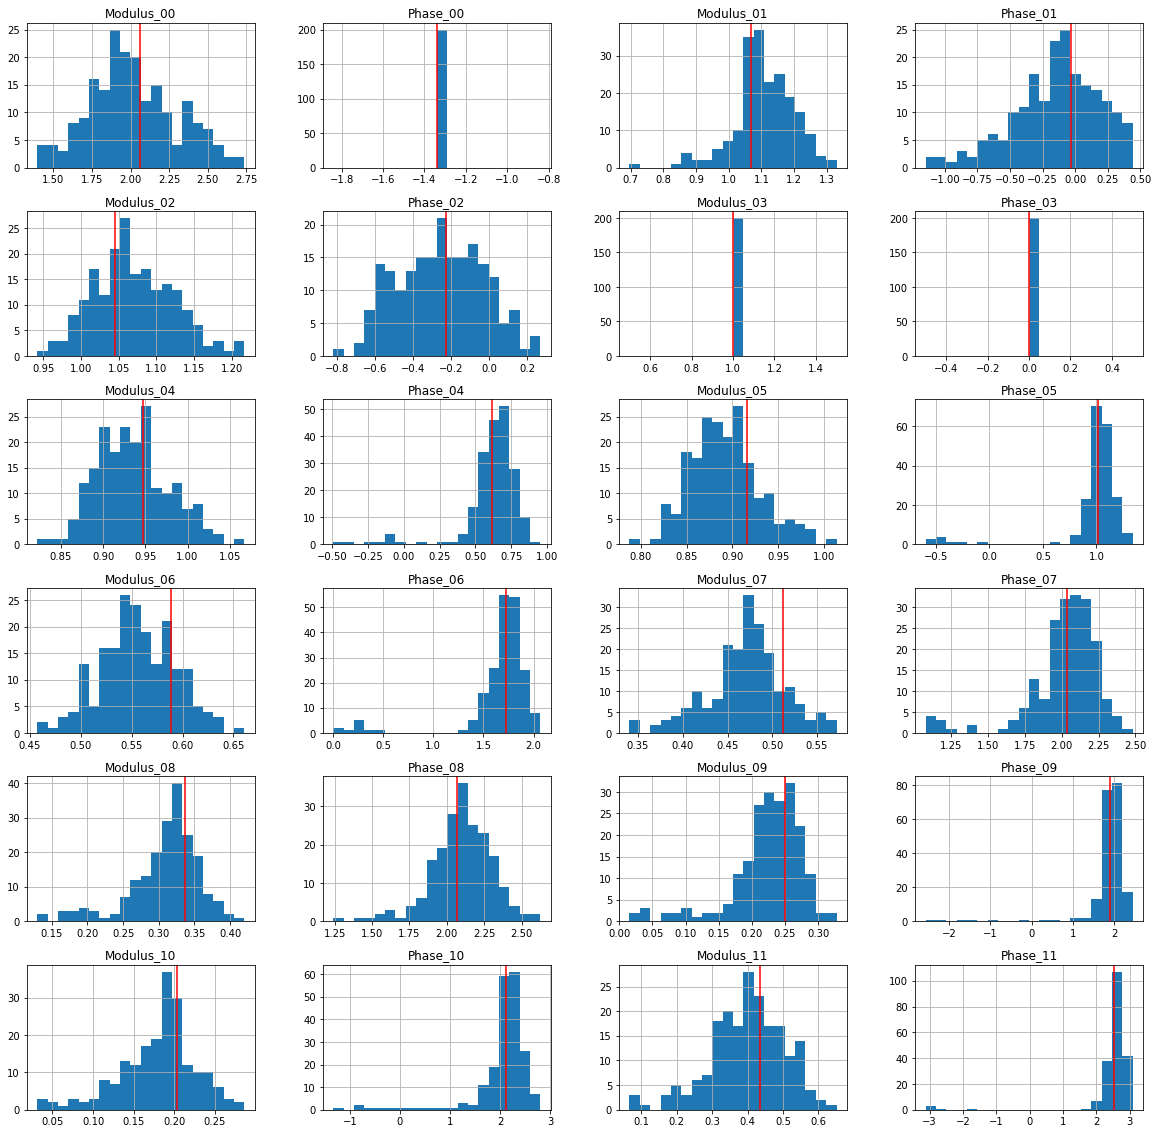

In [10]:
filter_plot = [col for col in df_original.columns if col.startswith('Modulus') or col.startswith('Phase')]
print(filter_plot)
df_toplot = df_original[filter_plot]
plots_Spline = df_toplot.hist(layout=(6,4),sharex=False,sharey=False,figsize=(20,20),bins=20)
for i in range(len(plots_Spline)):
    for j in range(len(plots_Spline[i])):
        plots_Spline[i][j].axvline(df_realvalue[filter_plot[i*len(plots_Spline[i])+j]].values[0],color="red")

In [11]:
#ROOT.gStyle.SetOptStat(0)
list_dat = [1.876,1.8766,1.9,1.925,1.95,1.975,2.0,2.1,2.2,2.5,2.8,3.1,3.4,3.416]
h1 = ROOT.TH1F("h1","Modulus(a_{0})",len(list_dat)-1,array('d',list_dat))
h2 = ROOT.TH1F("h2","Phase(#delta_{0})",len(list_dat)-1,array('d',list_dat))
for i in range(len(list_dat)-2):
    #h1.GetXaxis().SetBinLabel(i+1,"{0:.3f}".format(list_dat[i]))
    if i == 3:
        h1.SetBinContent(i+1,1)
        h1.SetBinError(i+1,0)
        h2.SetBinContent(i+1,0.001)
        h2.SetBinError(i+1,0)
    else:
        h1.SetBinContent(i+1,df_realvalue["modulus_{0:02d}".format(i)].values[0])
        h1.SetBinError(i+1,df_original["modulus_{0:02d}".format(i)].std())
        h2.SetBinContent(i+1,df_realvalue["phase_{0:02d}".format(i)].values[0])
        h2.SetBinError(i+1,df_original["phase_{0:02d}".format(i)].std())

c1 = ROOT.TCanvas("c1","c1",800,600)
h1.Draw()
h1.GetXaxis().SetRangeUser(1.8,3.5)
c1.SaveAs("modulus.pdf")
c2 = ROOT.TCanvas("c2","c2",800,600)
h2.Draw()
h2.GetXaxis().SetRangeUser(1.8,3.5)
l1 = ROOT.TLine(1.75,3.1415,3.4,3.1415)
l2 = ROOT.TLine(1.75,-3.1415,3.4,-3.1415)
l1.SetLineColor(2)
l1.SetLineStyle(2)
l2.SetLineColor(2)
l2.SetLineStyle(2)
l1.Draw("same")
l2.Draw("same")
c2.SaveAs("phase.pdf")

KeyError: 'modulus_00'

In [ ]:
len(list_dat)

14